In [215]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [216]:
data = pd.read_csv("../data/crabs.csv") 

data.head()

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4
2           3  B   M      3  9.2  7.8  19.0  22.4  7.7
3           4  B   M      4  9.6  7.9  20.1  23.1  8.2
4           5  B   M      5  9.8  8.0  20.3  23.0  8.2

In [217]:
DATA=data.iloc[:,4:9].values

In [218]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [219]:
x=sc.fit_transform(DATA) # Centrée reduire

In [220]:
from sklearn.decomposition import PCA

In [221]:
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x) #vecteurs contenant les coordonnées de nos axes principales .

n = (acp.n_components_)

In [222]:
#Valeurs propres : 
variance = acp.explained_variance_
print(variance)
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[4.81289928e+00 1.52447444e-01 4.68673106e-02 1.11913137e-02
 1.72027905e-03]
[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]


In [223]:
# test des bâtons brisés (quelles axes garder)
bk = 1/np.arange(n,0,-1)
print(bk)
bk = np.cumsum(bk)
print(bk)
bk = bk[::-1]
#print(bk)
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

[0.2        0.25       0.33333333 0.5        1.        ]
[0.2        0.45       0.78333333 1.28333333 2.28333333]
   Val.Propre    Seuils
0    4.788835  2.283333
1    0.151685  1.283333
2    0.046633  0.783333
3    0.011135  0.450000
4    0.001712  0.200000


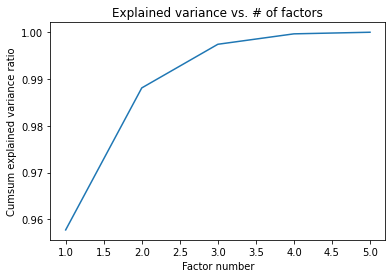

In [224]:
# cumul de variance expliquée ( autre méthode pour savoir quels axes garder )
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [225]:
#C'est constant à partir de 4 donc à priori on travaille sur les 4 premiers axes

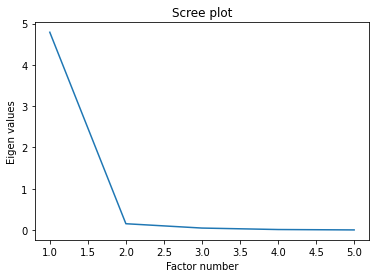

In [226]:
# scree plot : éboulis des valeurs propres ( 3éme méthode pour savoir quels axes garder)
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [227]:
# On garde les 2 premiers axes .

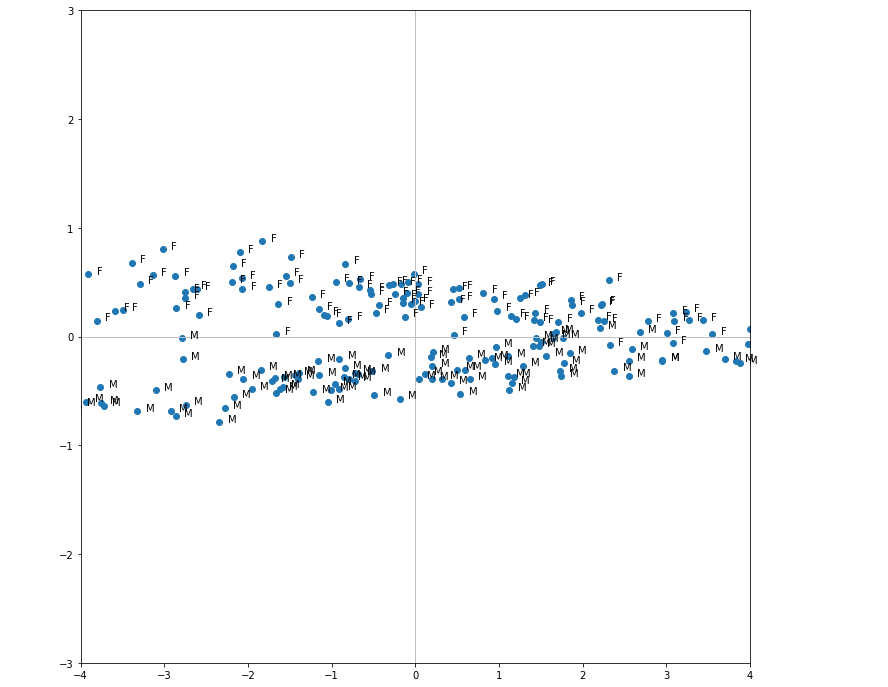

In [228]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(200):
     plt.annotate(data.sex[i],(coord[i,0]+0.1,coord[i,1])) #Donner à chaque point le sexe M ou F mais le problème ici c'est que c'est sans couleurs
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

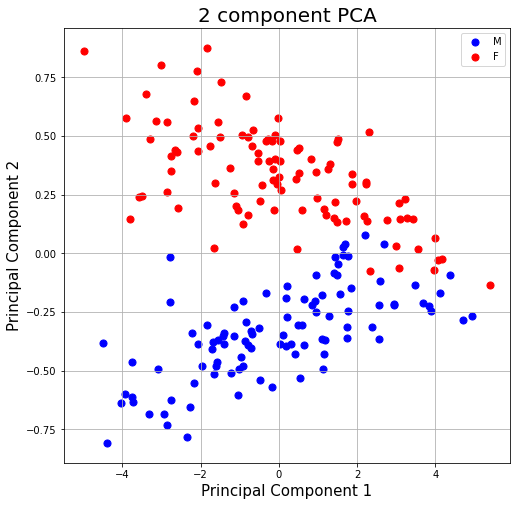

In [230]:
principaldf1 = pd.DataFrame(data = coord[:,0:2], columns = ['Axe principal 1', 'Axe principal 2']) # 2 axes seulement
finaldf1 = pd.concat([principaldf1, data[['sex']]], axis = 1)
(principaldf)
# Visualisation - 2éme méthode ( par rapport au sex)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf1['sex'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

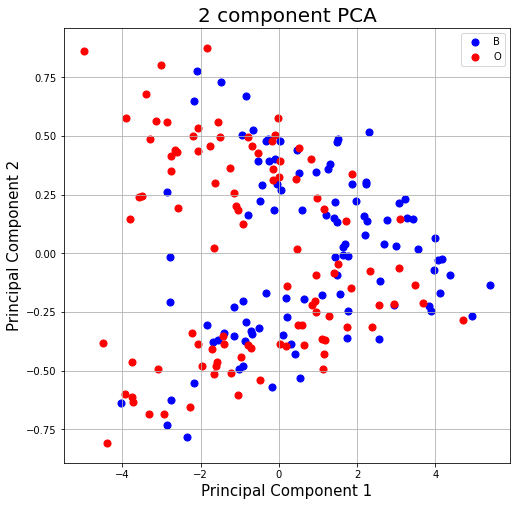

In [272]:
# Visualisation - 2éme méthode ( par rapport à l'espece)

principaldf1 = pd.DataFrame(data = coord[:,0:2], columns = ['Axe principal 1', 'Axe principal 2']) # 2 axes seulement
finaldf2 = pd.concat([principaldf1, data[['sp']]], axis = 1)
(principaldf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf2['sp'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf2.loc[indicesToKeep, 'Axe principal 1']
               , finaldf2.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

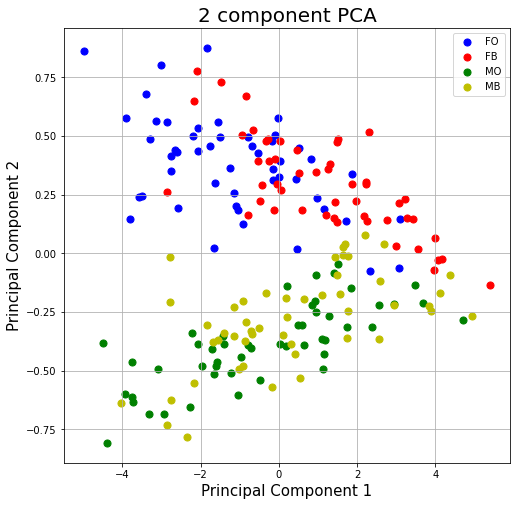

In [273]:
# Visualisation - 2éme méthode ( par rapport au sex et à l'espece)

principaldf1 = pd.DataFrame(data = coord[:,0:2], columns = ['Axe principal 1', 'Axe principal 2']) # 2 axes seulement


#Création d'une variable qui conbime le sexe et le sp : 
U=[]
for i in range(200):
    if data.sex[i]=='M':
        if data.sp[i]=='B':
            U.append('MB')
        else :
            U.append('MO')
    else:
        if data.sp[i]=='B':
            U.append('FB')
        else:
            U.append('FO')


V=pd.DataFrame(data=U,columns=['Crossing']) #Création du vecteur qui croise les deux données 


finaldf3 = pd.concat([principaldf1,V],axis=1)
(finaldf3)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['FO', 'FB','MO','MB']
colors = ['b', 'r','g','y']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf3['Crossing'] == target  # Crossing c'est le nom de la colonne considérée
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf3.loc[indicesToKeep, 'Axe principal 1']
               , finaldf3.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

